# Calculating emps in ANHA4-EXH001

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
ptrc_obj = nc.Dataset('_data\EXP14_1h_20100101_20100101_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

# emps calculations

In [7]:
ANHA4_obj = nc.Dataset('_data\ANHA4-EXH001_icemod_y2014m08d13.nc')
safl=ANHA4_obj.variables['iocesafl'][:]
salin=ANHA4_obj.variables['isssalin'][:]
nav_lat=ANHA4_obj.variables['nav_lat'][:]
nav_lon=ANHA4_obj.variables['nav_lon'][:]

## iocesafl

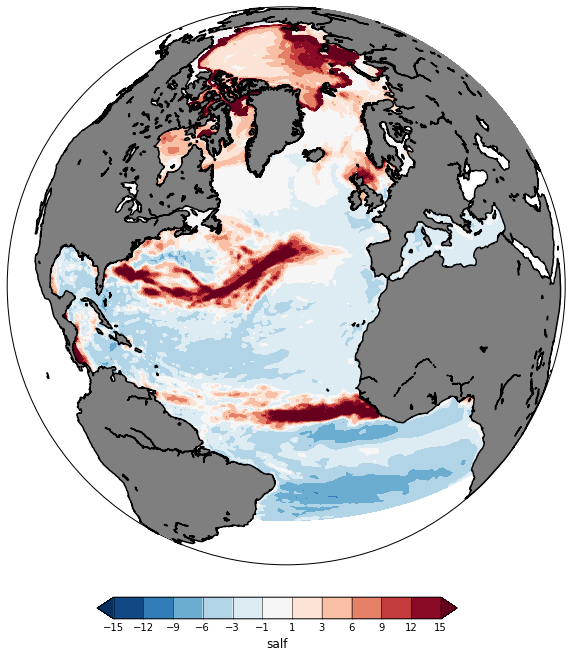

In [8]:
lev = [-15, -12, -9, -6, -3, -1, 1, 3, 6, 9, 12, 15]
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, safl[0, :, :], lev, cmap=plt.cm.RdBu_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('salf', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

## isssalin

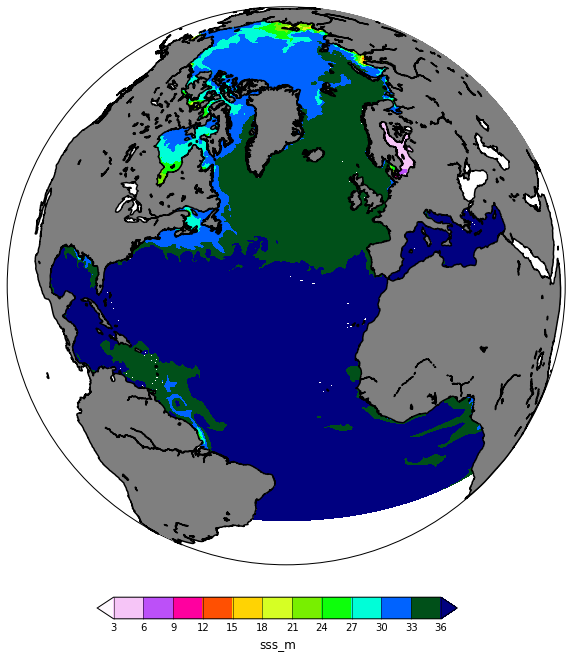

In [9]:
lev = np.arange(3, 38, 3)
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, salin[0, :, :], lev, cmap=plt.cm.gist_ncar_r, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('sss_m', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

In [10]:
emps=-1.0*safl[0, :, :]*34.7/(3600.0*4*(salin[0, :, :]+1.0e-16))

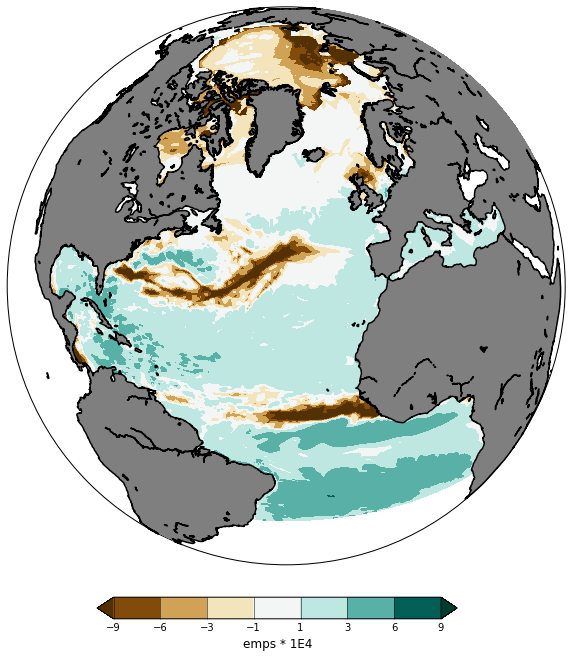

In [22]:
lev = np.array([-9, -6, -3, -1, 1, 3, 6, 9])
fig=plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

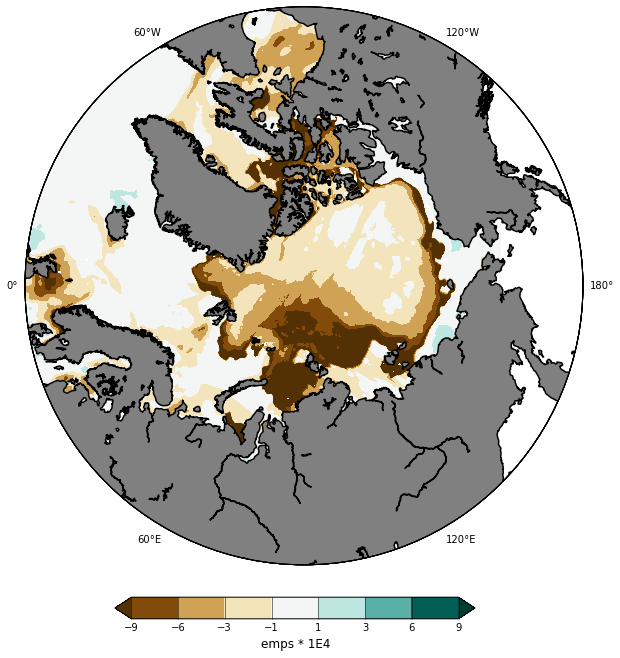

In [23]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, emps*1e4, lev, cmap=plt.cm.BrBG, extend='both')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps * 1E4', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)